# Лабораторная работа №1

## Задание 1

### Импорт библиотек

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

### Загрузка данных временного ряда (Максимальная цена за торговый день по акциям TESLA на ежедневном уровне)

In [29]:
data = pd.read_csv("TSLA.csv", sep=';', parse_dates=True, index_col="Date", dayfirst=True)

### График временного ряда

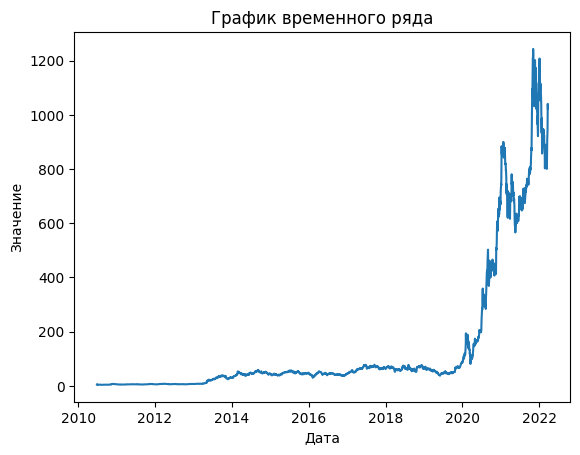

In [30]:
plt.plot(data.index, data["Value"])
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График временного ряда")
plt.show()

График временного ряда отображает динамику изменения цены актива во времени. 
Наблюдается восходящий тренд с резким увеличением цен, начиная примерно с 2020 года.

### Построение скользящих средних

In [31]:
rolling_mean_5 = data["Value"].rolling(window=5).mean()
rolling_mean_10 = data['Value'].rolling(window=10).mean()
rolling_mean_30 = data['Value'].rolling(window=30).mean()
rolling_mean_50 = data['Value'].rolling(window=50).mean()

### Графики скользящего среднего с окнами 5, 10, 30 и 50

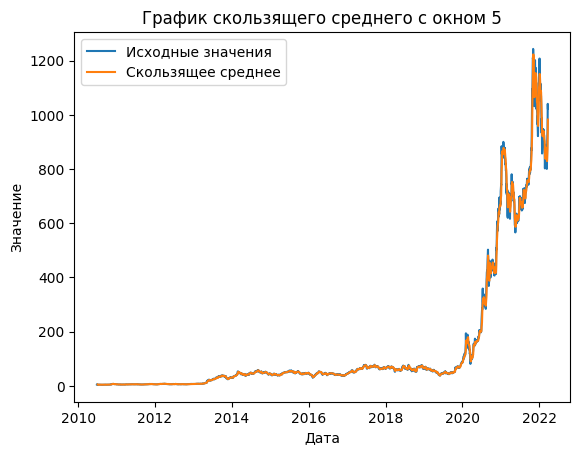

In [32]:
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, rolling_mean_5, label="Скользящее среднее")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График скользящего среднего с окном 5")
plt.legend()
plt.show()

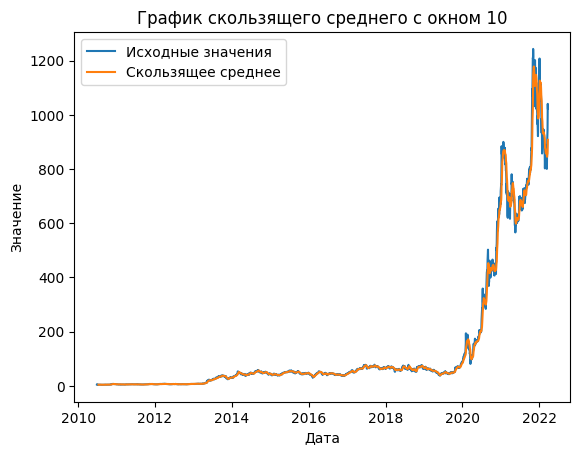

In [33]:
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, rolling_mean_10, label="Скользящее среднее")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График скользящего среднего с окном 10")
plt.legend()
plt.show()

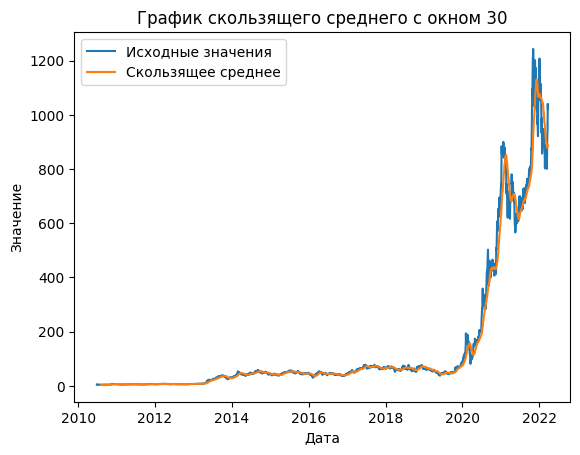

In [34]:
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, rolling_mean_30, label="Скользящее среднее")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График скользящего среднего с окном 30")
plt.legend()
plt.show()

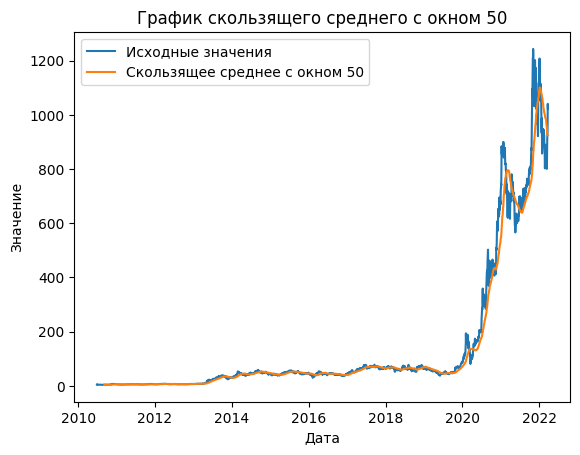

In [35]:
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, rolling_mean_50, label="Скользящее среднее с окном 50")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График скользящего среднего с окном 50")
plt.legend()
plt.show()

Чем больше окно, тем более сглаженными и менее чувствительными к краткосрочным колебаниям становятся данные, что делает такие окна полезными для выявления долгосрочных трендов.

### Построение экспоненциальных скользящих средних

In [36]:
ema_5 = data["Value"].ewm(alpha=0.05, adjust=False).mean()
ema_10 = data["Value"].ewm(alpha=0.1, adjust=False).mean()
ema_30 = data["Value"].ewm(alpha=0.3, adjust=False).mean()
ema_50 = data["Value"].ewm(alpha=0.5, adjust=False).mean()

### Графики с экспоненциальными скользящими средними с окнами 5, 10, 30 и 50

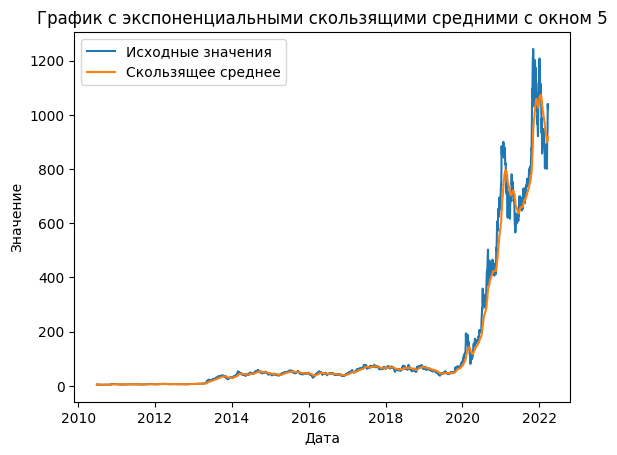

In [37]:
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, ema_5, label="Скользящее среднее")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График с экспоненциальными скользящими средними с окном 5")
plt.legend()
plt.show()

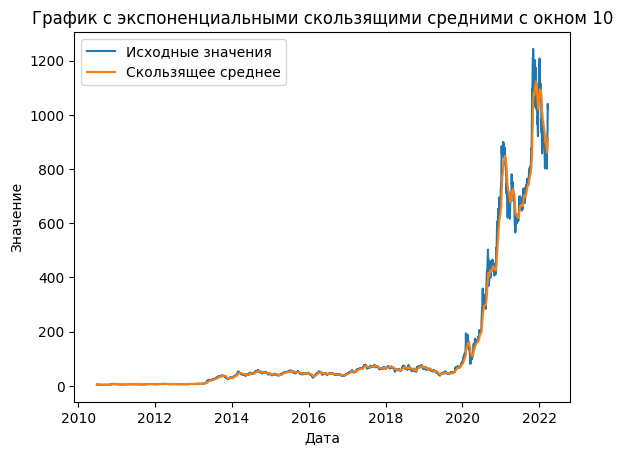

In [38]:
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, ema_10, label="Скользящее среднее")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График с экспоненциальными скользящими средними с окном 10")
plt.legend()
plt.show()

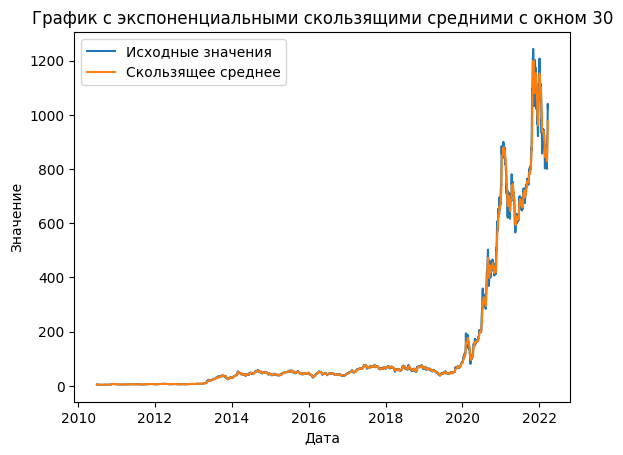

In [39]:
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, ema_30, label="Скользящее среднее")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График с экспоненциальными скользящими средними с окном 30")
plt.legend()
plt.show()

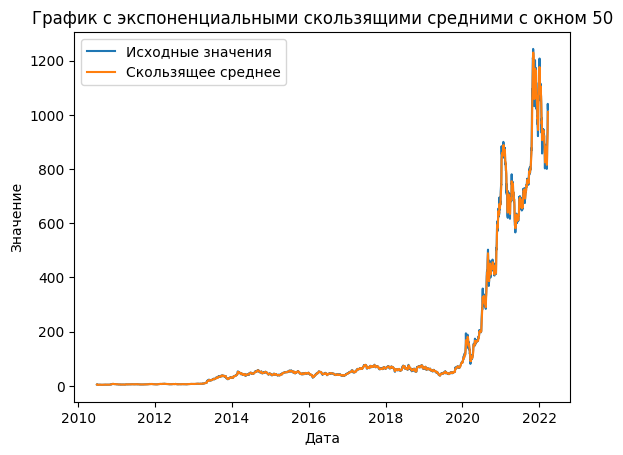

In [40]:
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, ema_50, label="Скользящее среднее")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График с экспоненциальными скользящими средними с окном 50")
plt.legend()
plt.show()

Чем больше окно, тем сильнее сглаживание и меньше реакция на краткосрочные изменения. EMA с маленькими окнами лучше подходят для краткосрочного анализа, а с большими окнами — для долгосрочного трендового анализа.

### Прогнозирование на основе EMA 5

In [41]:
forecast_periods = 5

last_5_values = data["Value"].iloc[-5:]
last_ema = ema_5.iloc[-1]

alpha = 0.3

forecast_values = [last_ema]

### Расчет EMA на основе последних 5 дней

In [42]:
for value in last_5_values:
    next_ema = alpha * value + (1 - alpha) * forecast_values[-1]
    forecast_values.append(next_ema)

forecast_ema_5 = [forecast_values[-1]] * forecast_periods
forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods)

### Построение графика прогноза

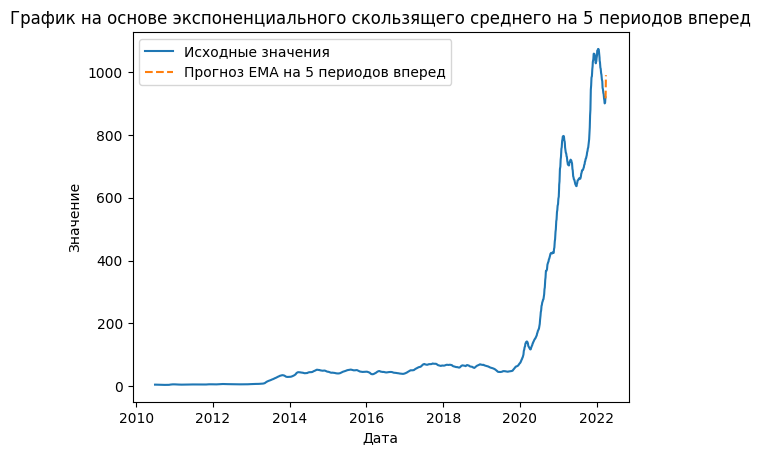

In [43]:
# Построение графика прогноза
forecast_series = pd.Series(forecast_values[1:], index=forecast_dates)

plt.plot(data.index, ema_5, label="Исходные значения")
plt.plot(forecast_series.index, forecast_series.values, label="Прогноз EMA на 5 периодов вперед", linestyle="--")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График на основе экспоненциального скользящего среднего на 5 периодов вперед")
plt.legend()
plt.show()